In [129]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from matplotlib import pyplot as plt

# Assignment #1 - Basic Data Exploration in Python ..

## Assignment Overview

In this assignment you'll load some data into a python notebook, and use some basic functions to do some basic analysis. Each section asks you to either calculate some answers or explore some information found in the data. When generating your answers, try to think about a few factors that can make your code better:
<ul>
<li> Present the answers clearly. Use the markdown cells, code comments, and formatting to help make your answers readable. One of the features of notebooks is that they allow us to combine code and commentary, and we need to ensure both are readable. Refer to the guide in the guides folder of the exercises workbook for an explaination and examples of different formatting. 
<li> Make your code clear. It is easy to make sense of small pieces of code, for short periods of time, so if your code makes little sense here, it won't really hurt your ability to find the answers. If you need to come back to it later, or others need to edit it, having code that doesn't make sense is a big issue. Use things like clearly named variables, comments, and spacing to make things readable. Even in this course, if you are looking back to something from 2 months ago for the project, it is far easier to understand code that is cleaned up a little. 
<li> Structure the code well. If there is some kind of repetitive task, it should likely be moved into a function. If there is something that happens several times, it should be in a loop. Having well structured code makes it easy to reuse stuff later, understand how things work, debug errors, and share code with others. This is something to keep in the back of your minds, right now you may not have much experience to lean on to judge how things should be, as you read, adjust, and write code it will become more clear. 
</ul>

## Peer Evaluation

This assignemnt will have a peer evaluation for the grade - you'll each read some other notebooks and evaluate their answers. The reason for this is not (entirely) my personal laziness, we are hoping to accomplish a couple of things:
<ul>
<li> Quick experience reading notebooks. One of the important skills we need to have is the ability to read examples that we find and adapting it to our scenario. This is practice with data you're now comfortable with.
<li> Critically evaluating what makes sense in a data notebook. You know how you attempted to explain your look at the data, how did other people do it? What was better? What was worse?
<li> Design is subjective. This will give you a set of opinions that are not mine. You will end up with plenty of feedback of what I think, feadback of others early-on should hopefully help you make things appealing to all and not tailored to me. 
</ul>
Doing this right up front will hopefully help kickstart some of that expericence. 

### Grading

The detailed grading is defined in the marking guide in the Moodle workshop. Note that there's points both for getting a correct answer and for presenting it in a way that makes sense. 

## Structure

Each section contains a set of questions/prompts and a rough framework for your responses. You can change the structure around, just make sure it is readable. What I have there is just a loose guide to help get you started, you're not bound to it. 

## Load Data

Load the labor data into a dataframe. You probably don't want to change this section. 

In [130]:
#Load/preview data
df = pd.read_csv("LabourTrainingEvaluationData.csv")

In [131]:
df = df.sort_values("Earnings_1974")


In [132]:
display(pd.concat([df.head(20),
                   df.tail(20)]))

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
5834,16,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.00,2323.8390,2625.92000
13932,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,0.00,0.0000,0.00000
8030,19,HighSchool,NotBlack,NotHispanic,NotMarried,0,0.00,483.3871,5334.59300
5788,17,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.00,1079.5650,7248.24900
13927,55,LessThanHighSchool,NotBlack,NotHispanic,Married,1,0.00,0.0000,0.00000
2483,53,LessThanHighSchool,black,NotHispanic,Married,1,0.00,0.0000,0.00000
9186,17,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.00,4040.7580,9713.09700
11021,26,HighSchool,black,NotHispanic,NotMarried,0,0.00,1448.3710,0.00000
9192,23,Intermediate,NotBlack,NotHispanic,NotMarried,0,0.00,601.5484,23018.55000
2491,31,LessThanHighSchool,NotBlack,NotHispanic,Married,1,0.00,0.0000,591.09060


In [133]:
df_o = df[['Earnings_1974','Earnings_1975','Earnings_1978']]

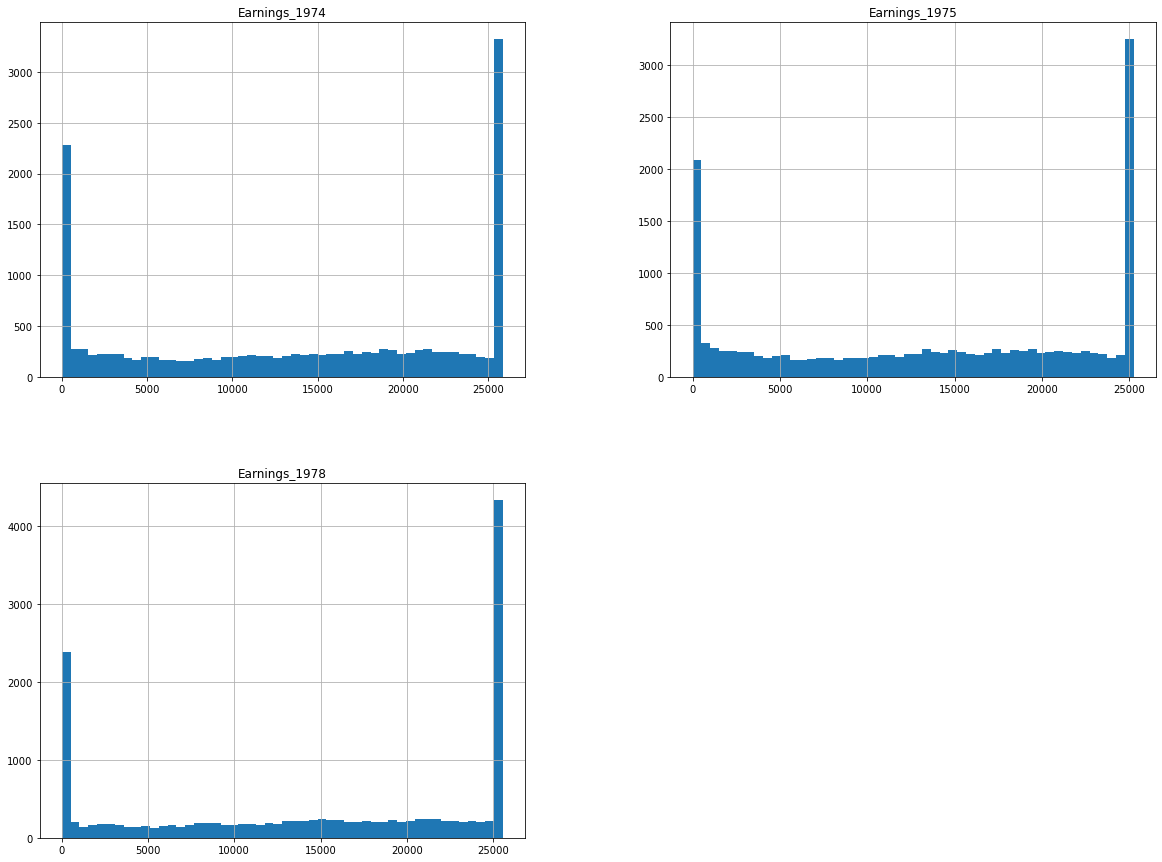

In [134]:
%matplotlib inline

import matplotlib.pyplot as plt
df_o.hist(bins=50, figsize=(20,15))
plt.show()

In [135]:
df_d = df_o[(df_o["Earnings_1974"]!=0)  | (df_o['Earnings_1974']>24000)] 

In [136]:
df_d = df_o[(df_o["Earnings_1974"]!=0)  & (df_o['Earnings_1974']<24000) & (df_o["Earnings_1975"]!=0)  & (df_o['Earnings_1975']<24000) 
                                  & (df_o["Earnings_1978"]!=0)  & (df_o['Earnings_1978']<24000) ] 

# Domain Knowledge

# Judgement call

In [137]:
df_d.head()

,Earnings_1974,Earnings_1975,Earnings_1978
3555,11.75560,8498.6610,17348.510
1699,11.75560,2968.3550,12832.580
7057,17.63340,186.1935,9223.969
3822,19.59267,1092.0970,18609.010
2502,19.59267,7834.4520,12810.410


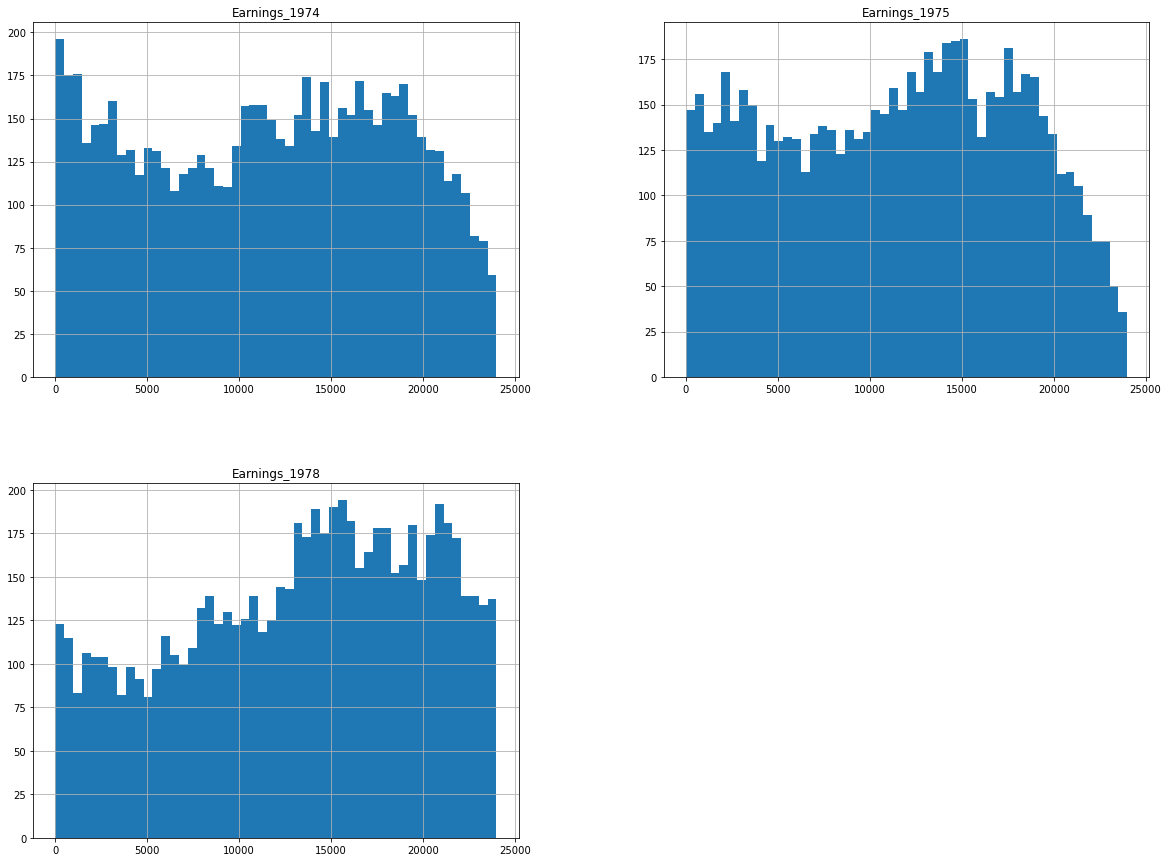

In [138]:
import matplotlib.pyplot as plt
df_d.hist(bins=50, figsize=(20,15))
plt.show()

In [139]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6916 entries, 3555 to 792
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Earnings_1974  6916 non-null   float64
 1   Earnings_1975  6916 non-null   float64
 2   Earnings_1978  6916 non-null   float64
dtypes: float64(3)
memory usage: 216.1 KB


# Counting the value of a column

In [140]:


len(df_d[df_d['Earnings_1974']<=300]) # counting the number that is less than 300


121

In [141]:
len(df_d[(df_d['Earnings_1974']<=300) | (df_d['Earnings_1975']<=300 ) | (df_d['Earnings_1978']<=300)])

264

In [142]:
df.value_counts('Race')

Race
NotBlack    14816
black        1176
dtype: int64

In [143]:
df.value_counts('Hisp')

Hisp
NotHispanic    14840
hispanic        1152
dtype: int64

In [144]:
df['racial'] = ''

In [145]:
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978,racial
5834,16,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.0,2323.8390,2625.920,
13932,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,0.0,0.0000,0.000,
8030,19,HighSchool,NotBlack,NotHispanic,NotMarried,0,0.0,483.3871,5334.593,
5788,17,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.0,1079.5650,7248.249,
13927,55,LessThanHighSchool,NotBlack,NotHispanic,Married,1,0.0,0.0000,0.000,


In [146]:
df.loc[((df['Hisp'] =="NotHispanic") & (df['Race']=='NotBlack')), 'racial'] = "NotBlackNotHispanic"

In [147]:
df.loc[((df['Hisp'] =="hispanic") & (df['Race']=='NotBlack')), 'racial'] = "hispanic"

In [148]:
df.loc[(df['Race']=='black'), 'racial'] = "black"

In [149]:
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978,racial
5834,16,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.0,2323.8390,2625.920,NotBlackNotHispanic
13932,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,0.0,0.0000,0.000,NotBlackNotHispanic
8030,19,HighSchool,NotBlack,NotHispanic,NotMarried,0,0.0,483.3871,5334.593,NotBlackNotHispanic
5788,17,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.0,1079.5650,7248.249,NotBlackNotHispanic
13927,55,LessThanHighSchool,NotBlack,NotHispanic,Married,1,0.0,0.0000,0.000,NotBlackNotHispanic


In [150]:
df.value_counts('racial')

racial
NotBlackNotHispanic    13664
black                   1176
hispanic                1152
dtype: int64

In [151]:
df_racialgroup = df.groupby("racial")
type(df_racialgroup)

pandas.core.groupby.generic.DataFrameGroupBy

In [152]:
df_racialgroup.last()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
racial,,,,,,,,,
NotBlackNotHispanic,27,Intermediate,NotBlack,NotHispanic,Married,0,25862.32,25243.55,25564.67
black,31,HighSchool,black,NotHispanic,Married,0,25862.32,25243.55,25564.67
hispanic,45,HighSchool,NotBlack,hispanic,Married,0,25862.32,25243.55,16591.91


In [153]:
df_racialgroup.Age.max()

racial
NotBlackNotHispanic    55
black                  55
hispanic               55
Name: Age, dtype: int64

In [154]:
df_racialgroup.Earnings_1978.agg(['max', 'min', 'count', 'median', 'mean'])

,max,min,count,median,mean
racial,,,,,
NotBlackNotHispanic,25564.67,0.0,13664,17278.315,15213.330607
black,25564.67,0.0,1176,12115.880,12006.682951
hispanic,25564.67,0.0,1152,13717.740,13396.677888


In [155]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


In [156]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,15992.0,NaN,NaN,NaN,33.225238,11.045216,16.0,24.0,31.0,42.0,55.0
Eduacation,15992,5,HighSchool,6252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,15992,2,NotBlack,14816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hisp,15992,2,NotHispanic,14840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaritalStatus,15992,2,Married,11382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nodeg,15992.0,NaN,NaN,NaN,0.295835,0.456432,0.0,0.0,0.0,1.0,1.0
Earnings_1974,15992.0,NaN,NaN,NaN,14016.800304,9569.795893,0.0,4403.45225,15123.58,23584.18,25862.32
Earnings_1975,15992.0,NaN,NaN,NaN,13650.803376,9270.403225,0.0,4398.823,14557.11,22923.7375,25243.55
Earnings_1978,15992.0,NaN,NaN,NaN,14846.659673,9647.391524,0.0,5669.298,16421.975,25564.67,25564.67
racial,15992,3,NotBlackNotHispanic,13664,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15992 entries, 5834 to 4287
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            15992 non-null  int64  
 1   Eduacation     15992 non-null  object 
 2   Race           15992 non-null  object 
 3   Hisp           15992 non-null  object 
 4   MaritalStatus  15992 non-null  object 
 5   Nodeg          15992 non-null  int64  
 6   Earnings_1974  15992 non-null  float64
 7   Earnings_1975  15992 non-null  float64
 8   Earnings_1978  15992 non-null  float64
 9   racial         15992 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 1.3+ MB


## Part 1 - Age

<ol>
<li> Make and plot a Hist and Pmf for age.
<li> What fraction of the people in the data are 51? What fraction are older than 51?
<li> What is the median age? 
<li> Does the distribution of the sample data seem to mirror the working age population?
</ol>

#### Make and plot a Hist and Pmf for age.

In [158]:
agehist = thinkstats2.Hist(df['Age'], label='Age')

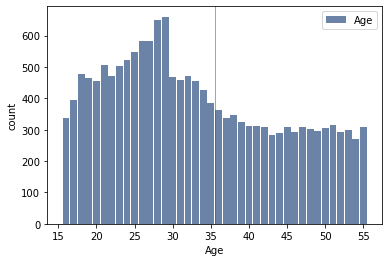

In [159]:
thinkplot.Hist(agehist)
thinkplot.Config(xlabel='Age', ylabel='count')
thinkplot.axvline(np.mean(agehist), color="red")


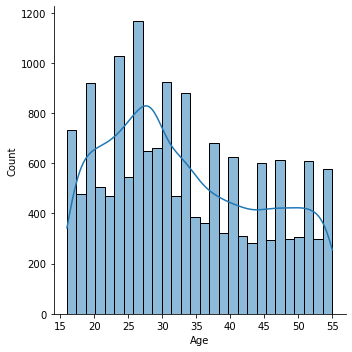

In [232]:
sns.displot(df["Age"], kde=True)

In [160]:
df2 = df[df['Race']=="black"]

df2["Earnings_1978"].describe()


count     1176.000000
mean     12006.682951
std       9349.118836
min          0.000000
25%       2465.217500
50%      12115.880000
75%      20655.290000
max      25564.670000
Name: Earnings_1978, dtype: float64

In [161]:
df3 = df2[["Earnings_1978", "Age"]]

In [162]:
df3.head()

,Earnings_1978,Age
2483,0.00000,53
11021,0.00000,26
13922,964.95550,39
8042,5495.66500,20
2593,54.67588,17


In [163]:
out = df3[(df3["Age"]<=20) & (df["Earnings_1978"]>20000)]

C:\Users\toluw\AppData\Local\Temp\ipykernel_21652\639177775.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  out = df3[(df3["Age"]<=20) & (df["Earnings_1978"]>20000)]


In [164]:
df[(df["Age"]>18) & (df["Age"]<=20) & (df["Earnings_1978"]>=24000)].sort_values("Earnings_1978")

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978,racial
8978,20,HighSchool,NotBlack,NotHispanic,NotMarried,0,10352.7700,9780.5320,24206.64,NotBlackNotHispanic
14839,20,HighSchool,NotBlack,NotHispanic,NotMarried,0,13812.8300,16650.0000,24474.11,NotBlackNotHispanic
6030,20,LessThanHighSchool,NotBlack,NotHispanic,Married,1,14308.5300,20576.1800,24511.05,NotBlackNotHispanic
8707,20,HighSchool,NotBlack,NotHispanic,Married,0,12660.7800,5682.4840,24558.34,NotBlackNotHispanic
522,20,Intermediate,NotBlack,NotHispanic,Married,0,12384.5300,13987.7900,24576.07,NotBlackNotHispanic
2188,20,Intermediate,NotBlack,NotHispanic,NotMarried,0,3779.4260,4633.3550,24883.44,NotBlackNotHispanic
12595,20,HighSchool,NotBlack,NotHispanic,NotMarried,0,14332.0400,13200.0500,24884.92,NotBlackNotHispanic
12176,19,HighSchool,black,NotHispanic,NotMarried,0,2241.4010,6629.5650,24935.16,black
13606,20,HighSchool,NotBlack,NotHispanic,NotMarried,0,8799.0670,15207.0000,24942.55,NotBlackNotHispanic
12713,19,HighSchool,NotBlack,NotHispanic,Married,0,11773.2300,24550.6900,25009.04,NotBlackNotHispanic


In [165]:
out.value_counts()

Earnings_1978  Age
20243.38       18     1
24935.16       19     1
25303.11       20     1
25564.67       18     1
               19     1
               20     1
dtype: int64

In [166]:
out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 3101 to 6558
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Earnings_1978  6 non-null      float64
 1   Age            6 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 144.0 bytes


In [167]:
df3_1 = df2[["Earnings_1978", "Eduacation"]]

<AxesSubplot:xlabel='Age'>

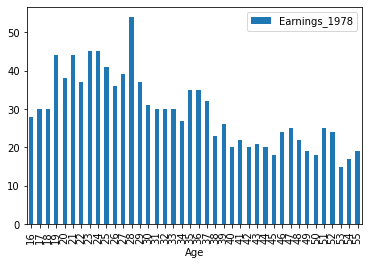

In [168]:
df3.groupby('Age').count().plot.bar()

<AxesSubplot:xlabel='Eduacation'>

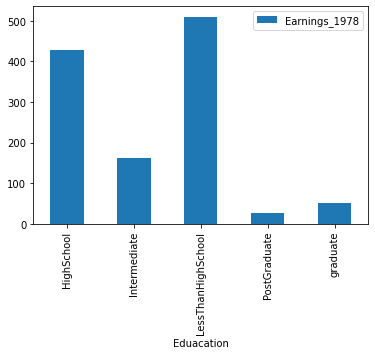

In [169]:
df3_1.groupby('Eduacation').count().plot.bar()

In [170]:
df3.describe()

,Earnings_1978,Age
count,1176.000000,1176.000000
mean,12006.682951,32.664116
std,9349.118836,10.978134
min,0.000000,16.000000
25%,2465.217500,23.000000
50%,12115.880000,31.000000
75%,20655.290000,41.000000
max,25564.670000,55.000000


array([[<AxesSubplot:title={'center':'Earnings_1978'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

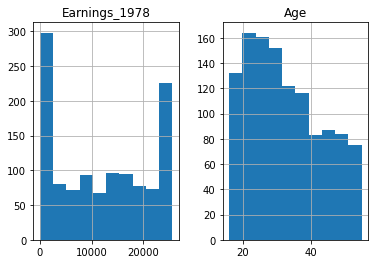

In [171]:
df3.hist()

In [172]:
df['Earnings_1978'].describe()

count    15992.000000
mean     14846.659673
std       9647.391524
min          0.000000
25%       5669.298000
50%      16421.975000
75%      25564.670000
max      25564.670000
Name: Earnings_1978, dtype: float64

In [173]:
df['Earnings_1978'].median()

16421.975

In [174]:
df['Earnings_1978'].mean()

14846.659672904903

In [175]:

df2pmf = thinkstats2.Pmf(df["Earnings_1978"])


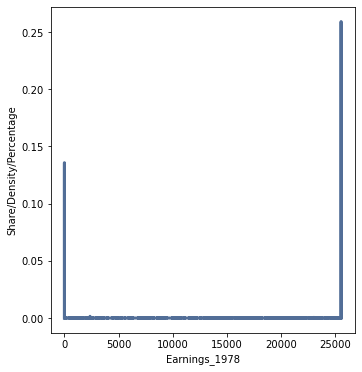

<Figure size 576x432 with 0 Axes>

In [176]:
#Graph
thinkplot.PrePlot(cols=2)
thinkplot.Pmfs([df2pmf])
#thinkplot.Show(xlabel="Earnings_1978", ylabel = "Percentage")
thinkplot.Show(xlabel="Earnings_1978", ylabel = "Share/Density/Percentage")

In [177]:
# PMF

dfpmf = thinkstats2.Pmf(df["Age"])


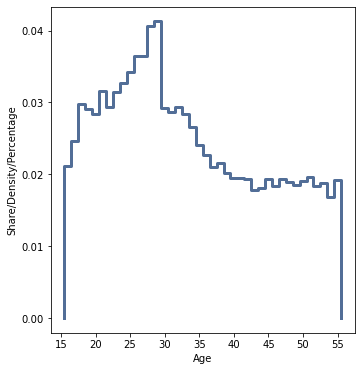

<Figure size 576x432 with 0 Axes>

In [178]:
#Graph
thinkplot.PrePlot(cols=2)
thinkplot.Pmfs([dfpmf])
#thinkplot.Show(xlabel="Age", ylabel = "Percentage")
thinkplot.Show(xlabel="Age", ylabel = "Share/Density/Percentage")

In [179]:
#find frequency of each Age using crosstab
df_freq = pd.crosstab(index=df['Age'], columns='count')

In [180]:
df_freq.tail()

col_0,count
Age,
51,314
52,294
53,300
54,270
55,307


In [181]:
#calculating frequency table 

s = df['Age']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
freq = pd.DataFrame({'counts': counts, 'percent': percent, '%': percent100})
freq.index.name = 'Age' # renaming the index cloumn name to age
freq.head()


,counts,percent,%
Age,,,
29,660,0.041271,4.1%
28,649,0.040583,4.1%
27,584,0.036518,3.7%
26,583,0.036456,3.6%
25,547,0.034205,3.4%


In [182]:
# creating a frequency table and ensuring it's sorted

s = df['Age']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
df_freq1= pd.DataFrame({'counts': counts, 'percent': percent, '%': percent100})
df_freq2 = df_freq1.sort_index () # making sure the date is sorted
df_freq2.index.name = 'Age' # renaming the index cloumn name to age
df_freq2.tail()



,counts,percent,%
Age,,,
51,314,0.019635,2.0%
52,294,0.018384,1.8%
53,300,0.018759,1.9%
54,270,0.016883,1.7%
55,307,0.019197,1.9%


In [183]:
# create a cumulative column

df_freq2["cumulative"]= df_freq2['percent'].cumsum().mul(100).round(1).astype(str) + '%'

In [184]:
df_freq2.tail() 

,counts,percent,%,cumulative
Age,,,,
51,314,0.019635,2.0%,92.7%
52,294,0.018384,1.8%,94.5%
53,300,0.018759,1.9%,96.4%
54,270,0.016883,1.7%,98.1%
55,307,0.019197,1.9%,100.0%


{'xscale': 'linear', 'yscale': 'linear'}

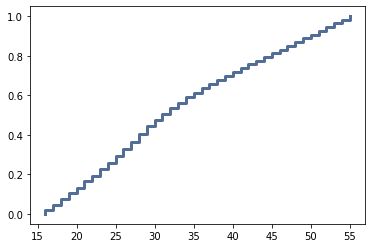

In [185]:
#Create and show CDF of Age
df_cdf = thinkstats2.Cdf(df['Age'])
thinkplot.Cdf(df_cdf)

In [186]:
df_cdf.Prob(51)
#And if we want to see in in pretty printing
print(str(round(df_cdf.Prob(51), 3)*100)+"%")

92.7%


#### What fraction of the people in the data are 51? What fraction are older than 51?

In [187]:
# using .loc and lamba for slicing is efficient
df_1 = df['Age'].loc[lambda x : x<=51]



In [188]:
df_1.head()

5834     16
13932    48
8030     19
5788     17
9186     17
Name: Age, dtype: int64

In [189]:
df_1.count()

14821

In [190]:
# using .loc and lamba for slicing is efficient
df_2 = df['Age'].loc[lambda x : x>51]


In [191]:
df_2.count()


1171

In [192]:
print(df.shape, df_1.shape, df_2.shape,sep="\n")

(15992, 10)
(14821,)
(1171,)


In [193]:
# %>51 in the dataset
print(">51:", df_2.shape[0]/df.shape[0])

>51: 0.07322411205602801


In [194]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


##### What is the median age?

In [195]:
df["Age"].median()

31.0

##### Does the distribution of the sample data seem to mirror the working age population?

### Part 2 - Demographics

<ul>
<li>Consider some of the demographic features: 
    <ul>
    <li>Education
    <li>Race
    <li>Hisp
    <li>MaritalStatus
    <li>Nodeg. 
    </ul>
</ul>
<ol>
<li>This data came from the United States, does it appear to be a representative sample of the US population?
<li>Demonstrate this in some way in your code. 
</ol>

##### Exploring the data...

In [196]:
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978,racial
5834,16,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.0,2323.8390,2625.920,NotBlackNotHispanic
13932,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,0.0,0.0000,0.000,NotBlackNotHispanic
8030,19,HighSchool,NotBlack,NotHispanic,NotMarried,0,0.0,483.3871,5334.593,NotBlackNotHispanic
5788,17,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.0,1079.5650,7248.249,NotBlackNotHispanic
13927,55,LessThanHighSchool,NotBlack,NotHispanic,Married,1,0.0,0.0000,0.000,NotBlackNotHispanic


(array([3402., 1088.,  945., 1078., 1161., 1270., 1368., 1396., 4284.]),
 array([    0.        ,  2873.59111111,  5747.18222222,  8620.77333333,
        11494.36444444, 14367.95555556, 17241.54666667, 20115.13777778,
        22988.72888889, 25862.32      ]),
 <BarContainer object of 9 artists>)

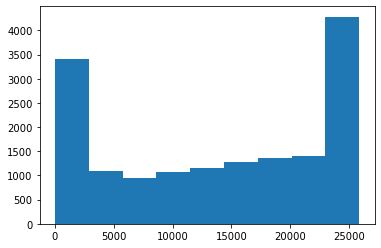

In [197]:
plt.hist(df['Earnings_1974'], bins=9)

(array([3312., 1164.,  971., 1060., 1238., 1274., 1401., 1332., 4240.]),
 array([    0.        ,  2804.83888889,  5609.67777778,  8414.51666667,
        11219.35555556, 14024.19444444, 16829.03333333, 19633.87222222,
        22438.71111111, 25243.55      ]),
 <BarContainer object of 9 artists>)

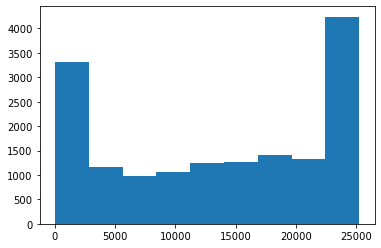

In [198]:
plt.hist(df['Earnings_1975'], bins=9)

In [199]:
df["Hisp"].value_counts()

NotHispanic    14840
hispanic        1152
Name: Hisp, dtype: int64

In [200]:
df_nhb = df[(df["Hisp"]=='NotHispanic') & (df['Race']=="NotBlack")]

In [201]:
df_nhb.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978,racial
5834,16,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.0,2323.8390,2625.920,NotBlackNotHispanic
13932,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,0.0,0.0000,0.000,NotBlackNotHispanic
8030,19,HighSchool,NotBlack,NotHispanic,NotMarried,0,0.0,483.3871,5334.593,NotBlackNotHispanic
5788,17,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.0,1079.5650,7248.249,NotBlackNotHispanic
13927,55,LessThanHighSchool,NotBlack,NotHispanic,Married,1,0.0,0.0000,0.000,NotBlackNotHispanic


In [202]:
df_hisp = df[df["Hisp"]=='hispanic']

In [203]:
df_hisp.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978,racial
13901,18,LessThanHighSchool,NotBlack,hispanic,NotMarried,1,0.0,3039.968,2027.441,hispanic
9179,27,graduate,NotBlack,hispanic,NotMarried,0,0.0,5370.968,12237.050,hispanic
5804,52,HighSchool,NotBlack,hispanic,Married,0,0.0,0.000,0.000,hispanic
5797,44,PostGraduate,NotBlack,hispanic,NotMarried,0,0.0,0.000,0.000,hispanic
10943,16,LessThanHighSchool,NotBlack,hispanic,NotMarried,1,0.0,3750.726,11770.090,hispanic


In [204]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


In [205]:
df["Race"].value_counts()

NotBlack    14816
black        1176
Name: Race, dtype: int64

In [206]:
df['Eduacation'].value_counts()

HighSchool            6252
LessThanHighSchool    4731
Intermediate          2708
graduate              1367
PostGraduate           934
Name: Eduacation, dtype: int64

In [207]:
df_black = df[df['Race']=="black"]

In [208]:
df_black.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978,racial
2483,53,LessThanHighSchool,black,NotHispanic,Married,1,0.0,0.0000,0.00000,black
11021,26,HighSchool,black,NotHispanic,NotMarried,0,0.0,1448.3710,0.00000,black
13922,39,LessThanHighSchool,black,NotHispanic,Married,1,0.0,0.0000,964.95550,black
8042,20,LessThanHighSchool,black,NotHispanic,NotMarried,1,0.0,3480.3870,5495.66500,black
2593,17,LessThanHighSchool,black,NotHispanic,NotMarried,1,0.0,297.1935,54.67588,black


In [209]:
df_black["Hisp"].value_counts()

NotHispanic    1176
Name: Hisp, dtype: int64

In [210]:
df_black["Eduacation"].value_counts()

LessThanHighSchool    510
HighSchool            427
Intermediate          161
graduate               52
PostGraduate           26
Name: Eduacation, dtype: int64

In [211]:
# calculating the counts an percentage of black people with eductaion

s = df_black.Eduacation
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'percent': percent, '%': percent100})


,counts,percent,%
LessThanHighSchool,510,0.433673,43.4%
HighSchool,427,0.363095,36.3%
Intermediate,161,0.136905,13.7%
graduate,52,0.044218,4.4%
PostGraduate,26,0.022109,2.2%


##### Demographic Conclusion


### Part 3 - Earnings

<ol>
<li>Make and plot a graph or graph of your choosing of the 3 earnings values, in order to answer the below question. Identify how the graph gave you your answer.
    <ul>
    <li>What is one conclusion could you draw from visualizing of the earnings in the different year? Please express it in plain language/non-statistics terms/as though you were explaining to one of your friends what happened to earnings between 1974 and 1978?
    </ul>
<li>Which has the greatest effect size on 1978 earnings: Race, Hispanic, MaritalStatus, or Nodeg? 
    <ul>
    <li>What could you investigate further in an attempt to explain this?
    </ul>
<li>Plot a histogram and PMF, and compute useful descriptive statistics (think: average...) for the 1978 earnings value. Use the "Cohorts" code from the quiz to break the data into cohorts, plotting each group (either on one chart, or separately, whichever makes the most sense for examining the data - state specifically why you chose 1 vs many charts.
    <ul>
    <li>What is the difference in median income between the groups?
    <li>Theorize a reason for the difference between the groups that could be explained with more data. Briefly describe the data you'd need. This does not need to be something you have data for, or know how to solve right now - just one well founded hypothesis on what might explain the difference.
    </ul>
<li>Are there outliers in the 1978 earnings data? Demonstrate this in some way with your code. 
    <ul>
    <li>What can you infer from the presence of outliers that may impact analysis of this data.
    </ul>
</ol>

##### Plot Earnings Data

As a conclusion, there seems to be a large jump in the number of people earning near the top end, around $25k. Otherwise the distributions are pretty similar. 

##### What to Investigate Further


##### Histogram and PMF

In [212]:
#Create a hist, pmf, and stats for 1987 Earnings
#Note: if you don't round or otherwise create bins, the thinkstats plots for this will be weird
#That's because there are very few values that are the same, e.g. $14762.34, $15672.86, etc... 
#Every cent is a different value. 
#Seaborn plots will probably look better by default. 

##### Differences in Median Income, and Theory on Why


##### Outliers

##### Outlier Conclusions


In [213]:
# putting the years in data frame and median earning and rounding to 2 decimal places

Data = {'Year': [1974,1975,1978],
        'Earning': [round(df_black["Earnings_1974"].median(),2),round(df_black["Earnings_1975"].median(),2),round(df_black["Earnings_1978"].median(),2)]
  }

In [214]:
df_Earning_black = pd.DataFrame(Data,columns=['Year','Earning'])


In [215]:
df_Earning_black.head()

,Year,Earning
0,1974,11079.65
1,1975,10845.78
2,1978,12115.88


In [216]:
df_Earning_black.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     3 non-null      int64  
 1   Earning  3 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 176.0 bytes


In [217]:
# putting the years in data frame and median earning and rounding to 2 decimal places

Data1 = {'Year': [1974,1975,1978],
        'Earning': [round(df_hisp["Earnings_1974"].median(),2),round(df_hisp["Earnings_1975"].median(),2),round(df_hisp["Earnings_1978"].median(),2)]
  }

In [218]:
df_Earning_hisp = pd.DataFrame(Data1,columns=['Year','Earning'])



In [219]:
df_Earning_hisp.head()

,Year,Earning
0,1974,12668.61
1,1975,12378.29
2,1978,13717.74


In [220]:
Data2 = {'Year': [1974,1975,1978],
        'Earning': [round(df_nhb["Earnings_1974"].median(),2),round(df_nhb["Earnings_1975"].median(),2),round(df_nhb["Earnings_1978"].median(),2)]
  }

In [221]:
df_Earning_nhb = pd.DataFrame(Data2,columns=['Year','Earning'])


In [222]:
df_Earning_nhb.head()

,Year,Earning
0,1974,15881.82
1,1975,15241.92
2,1978,17278.31


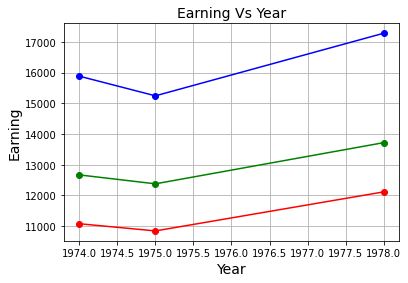

In [223]:
plt.plot(df_Earning_black['Year'], df_Earning_black['Earning'], color='red', marker='o')
plt.plot(df_Earning_hisp['Year'], df_Earning_hisp['Earning'], color='green', marker='o')
plt.plot(df_Earning_nhb['Year'], df_Earning_nhb['Earning'], color='blue', marker='o')
plt.title('Earning Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Earning', fontsize=14)

plt.grid(True)
plt.show()

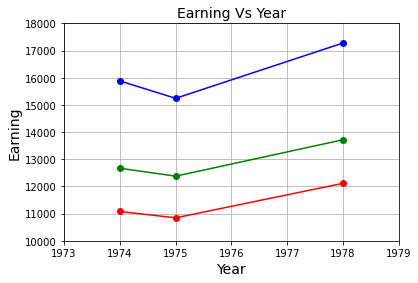

In [224]:
plt.plot(df_Earning_black['Year'], df_Earning_black['Earning'], color='red', marker='o')
plt.plot(df_Earning_hisp['Year'], df_Earning_hisp['Earning'], color='green', marker='o')
plt.plot(df_Earning_nhb['Year'], df_Earning_nhb['Earning'], color='blue', marker='o')
plt.title('Earning Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Earning', fontsize=14)
plt.axis([1973, 1979, 10000, 18000]) # setting axis scale X and Y
plt.grid(True)
plt.show()

In [225]:

df_Earning_black['Year'] = pd.to_datetime(df_Earning_black["Year"], format='%Y')

df_Earning_black = df_Earning_black.set_index('Year')


In [226]:
df_Earning_black.head()

,Earning
Year,
1974-01-01,11079.65
1975-01-01,10845.78
1978-01-01,12115.88


In [227]:
df_Earning_hisp['Year'] = pd.to_datetime(df_Earning_hisp["Year"], format='%Y')
df_Earning_hisp = df_Earning_hisp.set_index('Year')
df_Earning_hisp.head()

,Earning
Year,
1974-01-01,12668.61
1975-01-01,12378.29
1978-01-01,13717.74


In [228]:
df_Earning_nhb['Year'] = pd.to_datetime(df_Earning_nhb["Year"], format='%Y')
df_Earning_nhb = df_Earning_nhb.set_index('Year')
df_Earning_nhb.head()

,Earning
Year,
1974-01-01,15881.82
1975-01-01,15241.92
1978-01-01,17278.31


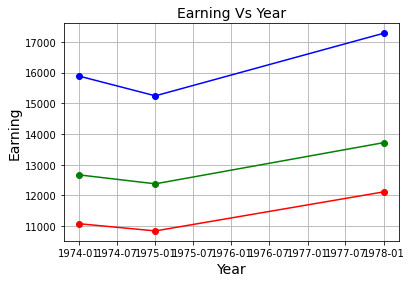

In [229]:
plt.plot(df_Earning_black['Earning'], color='red', marker='o')
plt.plot(df_Earning_hisp['Earning'], color='green', marker='o')
plt.plot(df_Earning_nhb['Earning'], color='blue', marker='o')
plt.title('Earning Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Earning', fontsize=14)
plt.grid(True)
plt.show()

In [230]:
df_Earning = df[["Earnings_1974", "Earnings_1975", "Earnings_1978"]]

In [231]:
#find Q1, Q3, and interquartile range for each column
import scipy.stats as stats
Q1 = df_Earning.quantile(q=.25)
Q3 = df_Earning.quantile(q=.75)
IQR = df_Earning.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df_Earning[~((df_Earning < (Q1-1.5*IQR)) | (df_Earning > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape


(15992, 3)